# MNIST - Categorical Classification
> # Overfitting
## Import Tensorflow & Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

* TensorFlow Version 지정

In [2]:
# %tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'2.3.0'

* GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

* Keras Version 확인

In [4]:
import keras

keras.__version__

'2.4.3'

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [5]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


* Train_Data Information

In [6]:
print(len(train_images))
print(train_images.shape)

print(len(train_labels))
print(train_labels[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


* Test_Data Information

In [7]:
print(len(test_images))
print(test_images.shape)

print(len(test_labels))
print(test_labels[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


> ## 2) Visualization

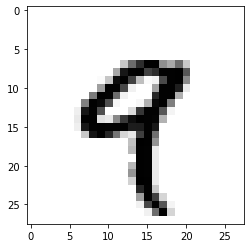

In [8]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [9]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(train_images[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (60000, 28, 28) to (60000, 784)

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

* Normalization

In [11]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

In [12]:
print(train_images[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## 2) One Hot Encoding

In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
print(train_labels[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [15]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [16]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


* 모델 세션 초기화 및 삭제

In [17]:
# from keras import backend as K 
# K.clear_session()
# del mnist

> ## 2) Model Compile

* 모델 학습방법 설정

In [18]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행(약 3분)

In [19]:
Hist_mnist = mnist.fit(train_images, train_labels,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2593 - accuracy: 0.9200 - val_loss: 0.1280 - val_accuracy: 0.9622
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0939 - accuracy: 0.9714 - val_loss: 0.1050 - val_accuracy: 0.9687
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.0916 - val_accuracy: 0.9736
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0923 - val_accuracy: 0.9771
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0930 - val_accuracy: 0.9764
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0987 - val_accuracy: 0.9772
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.1041 - val_accuracy: 0.9793

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

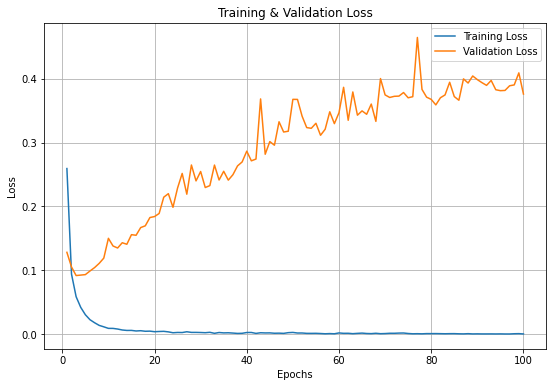

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [21]:
loss, accuracy = mnist.evaluate(test_images, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.9829
Loss = 0.33723
Accuracy = 0.98290


> ## 6) Model Predict

* Probability

In [22]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(test_images[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [23]:
print(mnist.predict_classes(test_images[:1,:]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7]


# 
# 
# 
# The End
# 
# 
# 